## 1. Input data processing

In [1]:
# Importing relevant libraries
import re
import csv
import glob
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import date as dt
import pandas_ta as ta
import matplotlib.pyplot as plt
import mibian as mb

####  1.1Input data nse_options_data_2015-2020

In [3]:
#Importing data from csv file  
input_data = pd.read_csv("C:\\Users\\sachin\\Desktop\\NIFTY.csv",
                        names=["contract","date","type","strike_price","expiry","open","high","low","close","oi","month_type"])

In [4]:
input_data.head(5)

,contract,date,type,strike_price,expiry,open,high,low,close,oi,month_type
0,NIFTY,20150101.0,CE,6550.0,20150129.0,0.0,0.0,0.0,1731.15,76900.0,Near
1,NIFTY,20150101.0,CE,6600.0,20150129.0,1710.0,1730.0,1710.0,1728.00,400150.0,Near
2,NIFTY,20150101.0,CE,6650.0,20150129.0,0.0,0.0,0.0,1670.00,25.0,Near
3,NIFTY,20150101.0,CE,6700.0,20150129.0,1600.0,1635.0,1585.0,1626.15,466325.0,Near
4,NIFTY,20150101.0,CE,6750.0,20150129.0,0.0,0.0,0.0,1565.40,0.0,Near


In [5]:
input_data = input_data.dropna()

input_data["date"] = input_data["date"].astype('int')
input_data["expiry"] = input_data["expiry"].astype('int')

input_data['join_col'] = input_data['contract']+input_data['date'].astype('str')

input_data.tail()

,contract,date,type,strike_price,expiry,open,high,low,close,oi,month_type,join_col
416489,NIFTY,20201231,PE,15300.0,20201231,1308.95,1308.95,1308.95,1308.95,150.0,Near,NIFTY20201231
416490,NIFTY,20201231,PE,15350.0,20201231,0.00,0.00,0.00,1472.35,0.0,Near,NIFTY20201231
416491,NIFTY,20201231,PE,15400.0,20201231,0.00,0.00,0.00,1464.45,0.0,Near,NIFTY20201231
416492,NIFTY,20201231,PE,15450.0,20201231,0.00,0.00,0.00,1514.45,0.0,Near,NIFTY20201231
416493,NIFTY,20201231,PE,15500.0,20201231,1486.50,1527.20,1486.45,1527.20,150.0,Near,NIFTY20201231


#### 1.2 Input Spot_data 2015-2020

In [6]:
%%time
eq_input_data = pd.read_csv("F:\\wqu capstone project\\NSE Equity & Options Data-2015-2020\\nse_equity_data_unadjusted_2015-2020.csv")

Wall time: 209 ms


In [8]:
select_contract = "NIFTY"
eq_input_data=eq_input_data[eq_input_data['ticker']== select_contract]

In [9]:
len(eq_input_data)

1477

In [13]:
eq_input_data

,ticker,date,open,high,low,close,volume
49601,NIFTY,20150101,8272.80,8294.70,8248.75,8284.00,0
49602,NIFTY,20150102,8288.70,8410.60,8288.70,8395.45,0
49603,NIFTY,20150105,8407.95,8445.60,8363.90,8378.40,0
49604,NIFTY,20150106,8325.30,8327.85,8111.35,8127.35,0
49605,NIFTY,20150107,8118.65,8151.20,8065.45,8102.10,0
...,...,...,...,...,...,...,...
51073,NIFTY,20201224,13672.20,13771.80,13626.90,13749.20,0
51074,NIFTY,20201228,13815.20,13885.30,13811.50,13873.20,0
51075,NIFTY,20201229,13910.30,13967.60,13859.90,13932.60,0
51076,NIFTY,20201230,13980.90,13997.00,13865.00,13982.00,0


##### calcuating ATR 

In [15]:
eq_input_data['ATR'] = ta.atr(eq_input_data['high'],eq_input_data['low'],eq_input_data['close'],timeperiod=14)

In [16]:
eq_input_data['join_col'] = eq_input_data['ticker']+eq_input_data['date'].astype('str')

In [17]:
input_result = pd.merge(input_data, eq_input_data, how="left", on="join_col")

In [18]:
input_result

,contract,date_x,type,strike_price,expiry,open_x,high_x,low_x,close_x,oi,month_type,join_col,ticker,date_y,open_y,high_y,low_y,close_y,volume,ATR
0,NIFTY,20150101,CE,6550.0,20150129,0.00,0.00,0.00,1731.15,76900.0,Near,NIFTY20150101,NIFTY,20150101.0,8272.8,8294.7,8248.75,8284.0,0,NaN
1,NIFTY,20150101,CE,6600.0,20150129,1710.00,1730.00,1710.00,1728.00,400150.0,Near,NIFTY20150101,NIFTY,20150101.0,8272.8,8294.7,8248.75,8284.0,0,NaN
2,NIFTY,20150101,CE,6650.0,20150129,0.00,0.00,0.00,1670.00,25.0,Near,NIFTY20150101,NIFTY,20150101.0,8272.8,8294.7,8248.75,8284.0,0,NaN
3,NIFTY,20150101,CE,6700.0,20150129,1600.00,1635.00,1585.00,1626.15,466325.0,Near,NIFTY20150101,NIFTY,20150101.0,8272.8,8294.7,8248.75,8284.0,0,NaN
4,NIFTY,20150101,CE,6750.0,20150129,0.00,0.00,0.00,1565.40,0.0,Near,NIFTY20150101,NIFTY,20150101.0,8272.8,8294.7,8248.75,8284.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282113,NIFTY,20201231,PE,15300.0,20201231,1308.95,1308.95,1308.95,1308.95,150.0,Near,NIFTY20201231,NIFTY,20201231.0,13970.0,14024.8,13936.50,13981.8,0,170.270096
282114,NIFTY,20201231,PE,15350.0,20201231,0.00,0.00,0.00,1472.35,0.0,Near,NIFTY20201231,NIFTY,20201231.0,13970.0,14024.8,13936.50,13981.8,0,170.270096
282115,NIFTY,20201231,PE,15400.0,20201231,0.00,0.00,0.00,1464.45,0.0,Near,NIFTY20201231,NIFTY,20201231.0,13970.0,14024.8,13936.50,13981.8,0,170.270096
282116,NIFTY,20201231,PE,15450.0,20201231,0.00,0.00,0.00,1514.45,0.0,Near,NIFTY20201231,NIFTY,20201231.0,13970.0,14024.8,13936.50,13981.8,0,170.270096


In [19]:
input_result = input_result[['contract','date_x','type','strike_price','expiry','open_x','high_x','low_x','close_x','oi','close_y','ATR']]

In [20]:
input_result = input_result.rename(columns={'date_x': 'date', 'open_x':'open','high_x':'high','low_x':'low','close_x':'close','close_y':'spot_price'})

#### Change and Select contract

In [21]:
input_result['spot_price'].describe()

count    280356.000000
mean       9928.555447
std        1525.449645
min        6970.600000
25%        8526.350000
50%       10118.200000
75%       11105.300000
max       13982.000000
Name: spot_price, dtype: float64

In [22]:
pivot_data = pd.pivot_table(input_result, values='close', index=['date','expiry','type','contract','spot_price','ATR'],
                    columns=['strike_price'], aggfunc=np.sum)
pivot_data

strike_price                                           2700.0   2800.0   \
date     expiry   type contract spot_price ATR                            
20150120 20150129 CE   NIFTY    8695.6     119.886537      NaN      NaN   
                  PE   NIFTY    8695.6     119.886537      NaN      NaN   
20150121 20150129 CE   NIFTY    8729.5     112.686290      NaN      NaN   
                  PE   NIFTY    8729.5     112.686290      NaN      NaN   
20150122 20150129 CE   NIFTY    8761.4     105.945722      NaN      NaN   
...                                                        ...      ...   
20201229 20201231 PE   NIFTY    13932.6    180.004372      NaN      NaN   
20201230 20201231 CE   NIFTY    13982.0    176.575488      NaN      NaN   
                  PE   NIFTY    13982.0    176.575488      NaN      NaN   
20201231 20201231 CE   NIFTY    13981.8    170.270096      NaN      NaN   
                  PE   NIFTY    13981.8    170.270096      NaN      NaN   

strike_price                                           2900.0   3000.0   \
date     expiry   type contract spot_price ATR                            
20150120 20150129 CE   NIFTY    8695.6     119.886537      NaN      NaN   
                  PE   NIFTY    8695.6     119.886537      NaN      NaN   
20150121 20150129 CE   NIFTY    8729.5     112.686290      NaN      NaN   
                  PE   NIFTY    8729.5     112.686290      NaN      NaN   
20150122 20150129 CE   NIFTY    8761.4     105.945722      NaN      NaN   
...                                                        ...      ...   
20201229 20201231 PE   NIFTY    13932.6    180.004372      NaN      NaN   
20201230 20201231 CE   NIFTY    13982.0    176.575488      NaN      NaN   
                  PE   NIFTY    13982.0    176.575488      NaN      NaN   
20201231 20201231 CE   NIFTY    13981.8    170.270096      NaN      NaN   
                  PE   NIFTY    13981.8    170.270096      NaN      NaN   

strike_price                                           3100.0   3200.0   \
date     expiry   type contract spot_price ATR                            
20150120 20150129 CE   NIFTY    8695.6     119.886537      NaN      NaN   
                  PE   NIFTY    8695.6     119.886537      NaN      NaN   
20150121 20150129 CE   NIFTY    8729.5     112.686290      NaN      NaN   
                  PE   NIFTY    8729.5     112.686290      NaN      NaN   
20150122 20150129 CE   NIFTY    8761.4     105.945722      NaN      NaN   
...                                                        ...      ...   
20201229 20201231 PE   NIFTY    13932.6    180.004372      NaN      NaN   
20201230 20201231 CE   NIFTY    13982.0    176.575488      NaN      NaN   
                  PE   NIFTY    13982.0    176.575488      NaN      NaN   
20201231 20201231 CE   NIFTY    13981.8    170.270096      NaN      NaN   
                  PE   NIFTY    13981.8    170.270096      NaN      NaN   

strike_price                                           3300.0   3400.0   \
date     expiry   type contract spot_price ATR                            
20150120 20150129 CE   NIFTY    8695.6     119.886537      NaN      NaN   
                  PE   NIFTY    8695.6     119.886537      NaN      NaN   
20150121 20150129 CE   NIFTY    8729.5     112.686290      NaN      NaN   
                  PE   NIFTY    8729.5     112.686290      NaN      NaN   
20150122 20150129 CE   NIFTY    8761.4     105.945722      NaN      NaN   
...                                                        ...      ...   
20201229 20201231 PE   NIFTY    13932.6    180.004372      NaN      NaN   
20201230 20201231 CE   NIFTY    13982.0    176.575488      NaN      NaN   
                  PE   NIFTY    13982.0    176.575488      NaN      NaN   
20201231 20201231 CE   NIFTY    13981.8    170.270096      NaN      NaN   
                  PE   NIFTY    13981.8    170.270096      NaN      NaN   

strike_price                                           3500.0   3600.0   ...  \
date     expiry 

In [23]:
pivot_data.tail()

strike_price                                           2700.0   2800.0   \
date     expiry   type contract spot_price ATR                            
20201229 20201231 PE   NIFTY    13932.6    180.004372      NaN      NaN   
20201230 20201231 CE   NIFTY    13982.0    176.575488      NaN      NaN   
                  PE   NIFTY    13982.0    176.575488      NaN      NaN   
20201231 20201231 CE   NIFTY    13981.8    170.270096      NaN      NaN   
                  PE   NIFTY    13981.8    170.270096      NaN      NaN   

strike_price                                           2900.0   3000.0   \
date     expiry   type contract spot_price ATR                            
20201229 20201231 PE   NIFTY    13932.6    180.004372      NaN      NaN   
20201230 20201231 CE   NIFTY    13982.0    176.575488      NaN      NaN   
                  PE   NIFTY    13982.0    176.575488      NaN      NaN   
20201231 20201231 CE   NIFTY    13981.8    170.270096      NaN      NaN   
                  PE   NIFTY    13981.8    170.270096      NaN      NaN   

strike_price                                           3100.0   3200.0   \
date     expiry   type contract spot_price ATR                            
20201229 20201231 PE   NIFTY    13932.6    180.004372      NaN      NaN   
20201230 20201231 CE   NIFTY    13982.0    176.575488      NaN      NaN   
                  PE   NIFTY    13982.0    176.575488      NaN      NaN   
20201231 20201231 CE   NIFTY    13981.8    170.270096      NaN      NaN   
                  PE   NIFTY    13981.8    170.270096      NaN      NaN   

strike_price                                           3300.0   3400.0   \
date     expiry   type contract spot_price ATR                            
20201229 20201231 PE   NIFTY    13932.6    180.004372      NaN      NaN   
20201230 20201231 CE   NIFTY    13982.0    176.575488      NaN      NaN   
                  PE   NIFTY    13982.0    176.575488      NaN      NaN   
20201231 20201231 CE   NIFTY    13981.8    170.270096      NaN      NaN   
                  PE   NIFTY    13981.8    170.270096      NaN      NaN   

strike_price                                           3500.0   3600.0   ...  \
date     expiry   type contract spot_price ATR                           ...   
20201229 20201231 PE   NIFTY    13932.6    180.004372      NaN      NaN  ...   
20201230 20201231 CE   NIFTY    13982.0    176.575488      NaN      NaN  ...   
                  PE   NIFTY    13982.0    176.575488      NaN      NaN  ...   
20201231 20201231 CE   NIFTY    13981.8    170.270096      NaN      NaN  ...   
                  PE   NIFTY    13981.8    170.270096      NaN      NaN  ...   

strike_price                                           15050.0  15100.0  \
date     expiry   type contract spot_price ATR                            
20201229 20201231 PE   NIFTY    13932.6    180.004372  1146.95  1176.45   
20201230 20201231 CE   NIFTY    13982.0    176.575488     0.70     0.60   
                  PE   NIFTY    13982.0    176.575488  1098.40  1119.05   
20201231 20201231 CE   NIFTY    13981.8    170.270096     0.10     0.05   
                  PE   NIFTY    13981.8    170.270096  1098.40  1138.60   

strike_price                                           15150.0  15200.0  \
date     expiry   type contract spot_price ATR                            
20201229 20201231 PE   NIFTY    13932.6    180.004372  1462.10  1273.55   
20201230 20201231 CE   NIFTY    13982.0    176.575488     0.45     0.45   
                  PE   NIFTY    13982.0    176.575488  1462.10  1218.00   
20201231 20201231 CE   NIFTY    13981.8    170.270096     0.05     0.05   
                  PE   NIFTY    13981.8    170.270096  1462.10  1224.35   

strike_price                                           15250.0  15300.0  \
date     expiry   type contract spot_price ATR                            
20201229 20201231 PE   NIFTY    13932.6    180.004372  1501.20  1422.40   
20201230 20201231 CE   NIFTY    13982.0    176.575488     

In [24]:
pivot_data.to_csv("F:\\wqu capstone project\\NSE Equity & Options Data-2015-2020\\NIFTY_pivot.csv")

In [25]:
table = pd.read_csv("F:\\wqu capstone project\\NSE Equity & Options Data-2015-2020\\NIFTY_pivot.csv")

In [26]:
table

,date,expiry,type,contract,spot_price,ATR,2700.0,2800.0,2900.0,3000.0,...,15050.0,15100.0,15150.0,15200.0,15250.0,15300.0,15350.0,15400.0,15450.0,15500.0
0,20150120,20150129,CE,NIFTY,8695.6,119.886537,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20150120,20150129,PE,NIFTY,8695.6,119.886537,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20150121,20150129,CE,NIFTY,8729.5,112.686290,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20150121,20150129,PE,NIFTY,8729.5,112.686290,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20150122,20150129,CE,NIFTY,8761.4,105.945722,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,20201229,20201231,PE,NIFTY,13932.6,180.004372,NaN,NaN,NaN,NaN,...,1146.95,1176.45,1462.10,1273.55,1501.20,1422.40,1472.35,NaN,NaN,NaN
2924,20201230,20201231,CE,NIFTY,13982.0,176.575488,NaN,NaN,NaN,NaN,...,0.70,0.60,0.45,0.45,0.25,0.35,0.05,0.05,1.00,NaN
2925,20201230,20201231,PE,NIFTY,13982.0,176.575488,NaN,NaN,NaN,NaN,...,1098.40,1119.05,1462.10,1218.00,1240.65,1322.85,1472.35,1464.45,1514.45,NaN
2926,20201231,20201231,CE,NIFTY,13981.8,170.270096,NaN,NaN,NaN,NaN,...,0.10,0.05,0.05,0.05,0.05,0.05,0.05,0.10,0.30,0.05


In [27]:
table['ATM_Strike'] = round(table['spot_price']/100)*100
table['date']= pd.to_datetime(table['date'].astype('str'))
table['expiry']= pd.to_datetime(table['expiry'].astype('str'))

In [28]:
stock=table[table['contract']==select_contract]
stock.drop(['contract'],axis=1,inplace=True)
stock.columns=stock.columns.astype('str')

In [29]:
stock['month_year'] = pd.to_datetime(stock['date']).dt.to_period('M')
stock['day'] = pd.to_datetime(stock['date']).dt.strftime('%d')

In [30]:
stock[['expiry','month_year']]

,expiry,month_year
0,2015-01-29,2015-01
1,2015-01-29,2015-01
2,2015-01-29,2015-01
3,2015-01-29,2015-01
4,2015-01-29,2015-01
...,...,...
2923,2020-12-31,2020-12
2924,2020-12-31,2020-12
2925,2020-12-31,2020-12
2926,2020-12-31,2020-12


In [31]:
stock['rank'] = stock['expiry'].rank(ascending = 1)

In [32]:
stock

,date,expiry,type,spot_price,ATR,2700.0,2800.0,2900.0,3000.0,3100.0,...,15250.0,15300.0,15350.0,15400.0,15450.0,15500.0,ATM_Strike,month_year,day,rank
0,2015-01-20,2015-01-29,CE,8695.6,119.886537,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8700.0,2015-01,20,7.5
1,2015-01-20,2015-01-29,PE,8695.6,119.886537,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8700.0,2015-01,20,7.5
2,2015-01-21,2015-01-29,CE,8729.5,112.686290,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8700.0,2015-01,21,7.5
3,2015-01-21,2015-01-29,PE,8729.5,112.686290,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8700.0,2015-01,21,7.5
4,2015-01-22,2015-01-29,CE,8761.4,105.945722,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8800.0,2015-01,22,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,2020-12-29,2020-12-31,PE,13932.6,180.004372,NaN,NaN,NaN,NaN,NaN,...,1501.20,1422.40,1472.35,NaN,NaN,NaN,13900.0,2020-12,29,2905.5
2924,2020-12-30,2020-12-31,CE,13982.0,176.575488,NaN,NaN,NaN,NaN,NaN,...,0.25,0.35,0.05,0.05,1.00,NaN,14000.0,2020-12,30,2905.5
2925,2020-12-30,2020-12-31,PE,13982.0,176.575488,NaN,NaN,NaN,NaN,NaN,...,1240.65,1322.85,1472.35,1464.45,1514.45,NaN,14000.0,2020-12,30,2905.5
2926,2020-12-31,2020-12-31,CE,13981.8,170.270096,NaN,NaN,NaN,NaN,NaN,...,0.05,0.05,0.05,0.10,0.30,0.05,14000.0,2020-12,31,2905.5


In [33]:
Table1 = stock.groupby('month_year').first()

In [34]:
Table1['month_year'] = pd.to_datetime(Table1['date']).dt.to_period('M')

In [35]:
Table3 = pd.DataFrame({"date": ["0"], "spot_price":0, "expiry": ["0"], "type": ["0"], "month_year":0, "day": ["0"],"ATR":0})
Table5 = pd.DataFrame({"date": ["0"], "spot_price":0, "expiry": ["0"], "type": ["0"], "month_year":0, "day": ["0"],"ATR":0})

In [37]:
CE_OTM_Strike = []
PE_OTM_Strike = []
month_year = []

In [41]:
for x in range (0,71):
    e=Table1.month_year[x]
    d=Table1.expiry[x]
    a= float((Table1.ATM_Strike[x]))

#     b = round((a -a*0.05)/100)*100
#     c = round((a -a*0.05)/100)*100
    # 15.78
#     b = round(a+ a*0.10)
#     c = round(a- a*0.10)
    b = a + 800
    c = a - 800
    
    

    f1 = str(float(a))#ATM
    f2 = str(float(b))#OTM
    f3 = str(float(c))#OTM
    print(f" {x}, {e} ATM {a} CE_OTM {b}  PE_OTM {c}")

    
    CE_OTM_Strike.append(b)
    PE_OTM_Strike.append(c)
    month_year.append(e)
    
#     stock['CE_OTM_Strike'].iloc[x].append(b)

    

    Table2 = pd.DataFrame({"date": stock["date"], "spot_price": stock["spot_price"], "expiry": stock["expiry"],
                           "type": stock["type"], "month_year": stock["month_year"], "day": stock["day"],
                           "ATR":stock["ATR"], "CE_OTM": stock[f2]})
    
#     for index,value in enumerate(Table2['CE_OTM']):02
#         Table2.loc[index,'CE_OTM_Strike'] = Table2.loc[index,str(value)]
    
    Table12 = pd.DataFrame({"date": stock["date"], "spot_price": stock["spot_price"], "expiry": stock["expiry"],
                           "type": stock["type"], "month_year": stock["month_year"], "day": stock["day"],
                            "ATR":stock["ATR"], "PE_OTM": stock[f3]})

    
    Table6= Table2.where((Table2.month_year == e) & (Table2.expiry == d) & (Table2.type == 'CE'))
    Table4= Table12.where((Table2.month_year == e) & (Table2.expiry == d) & (Table2.type == 'PE'))
    
    Table6 = Table6.dropna()
    Table4 = Table4.dropna()
#     Table4['day_to_expiry'] = (Table4['expiry']-Table4["date"])
    Table4['day_to_expiry'] = (Table4['expiry']-Table4["date"]).dt.days
    
    Table6.set_index("date", inplace = True)
    Table4.set_index("date", inplace = True)
    
    Table4['CE_OTM'] = Table6['CE_OTM']
#     Table4['day_to_expiry'] = Table4['expiry']-Table4.index
    Table4['strangle']= -(Table6['CE_OTM']+Table4['PE_OTM'])
    Table4['P&L']=Table4['strangle'].diff().cumsum()
    
    
    Table3 = Table3.append(Table4)
    Table7 = Table4.groupby('day').last()
    Table5 = Table5.append(Table7)

Table5.drop(Table5.index[0], inplace=True)
Table5['Total_P&L']=Table5['P&L'].cumsum()
Table5['Total_P&L']

 0, 2015-01 ATM 8700.0 CE_OTM 9500.0  PE_OTM 7900.0
 1, 2015-02 ATM 8800.0 CE_OTM 9600.0  PE_OTM 8000.0
 2, 2015-03 ATM 9000.0 CE_OTM 9800.0  PE_OTM 8200.0
 3, 2015-04 ATM 8600.0 CE_OTM 9400.0  PE_OTM 7800.0
 4, 2015-05 ATM 8300.0 CE_OTM 9100.0  PE_OTM 7500.0
 5, 2015-06 ATM 8400.0 CE_OTM 9200.0  PE_OTM 7600.0
 6, 2015-07 ATM 8500.0 CE_OTM 9300.0  PE_OTM 7700.0
 7, 2015-08 ATM 8500.0 CE_OTM 9300.0  PE_OTM 7700.0
 8, 2015-09 ATM 7800.0 CE_OTM 8600.0  PE_OTM 7000.0
 9, 2015-10 ATM 8000.0 CE_OTM 8800.0  PE_OTM 7200.0
 10, 2015-11 ATM 8100.0 CE_OTM 8900.0  PE_OTM 7300.0
 11, 2015-12 ATM 7900.0 CE_OTM 8700.0  PE_OTM 7100.0
 12, 2016-01 ATM 8000.0 CE_OTM 8800.0  PE_OTM 7200.0
 13, 2016-02 ATM 7600.0 CE_OTM 8400.0  PE_OTM 6800.0
 14, 2016-03 ATM 7200.0 CE_OTM 8000.0  PE_OTM 6400.0
 15, 2016-04 ATM 7700.0 CE_OTM 8500.0  PE_OTM 6900.0
 16, 2016-05 ATM 7800.0 CE_OTM 8600.0  PE_OTM 7000.0
 17, 2016-06 ATM 8200.0 CE_OTM 9000.0  PE_OTM 7400.0
 18, 2016-07 ATM 8300.0 CE_OTM 9100.0  PE_OTM 7500.0
 19

20        NaN
21       1.65
22       3.95
23       7.30
27      11.50
       ...   
20   -6608.05
23   -6940.10
24   -7395.90
25   -7650.70
26   -8018.05
Name: Total_P&L, Length: 1328, dtype: float64

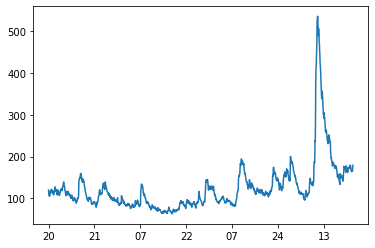

In [42]:
Table5['ATR'].plot()

In [43]:
lists = [month_year,CE_OTM_Strike,PE_OTM_Strike]
df = pd.concat([pd.Series(x) for x in lists],axis=1)

In [45]:
df.columns = ('month_year','CE_OTM_Strike','PE_OTM_Strike')

In [46]:
Table5['month_year'] = (Table5['month_year'].astype('str'))

In [47]:
df['month_year'] = (df['month_year'].astype('str'))

In [48]:
final_df = pd.merge(Table5,df,how='left',on='month_year')

In [49]:
final_df.tail()

,date,spot_price,expiry,type,month_year,day,ATR,PE_OTM,day_to_expiry,CE_OTM,strangle,P&L,Total_P&L,CE_OTM_Strike,PE_OTM_Strike
1323,NaN,12859.0,2020-11-26 00:00:00,PE,2020-11,NaN,167.394833,1.35,6.0,389.80,-391.15,-278.95,-6608.05,12500.0,10900.0
1324,NaN,12926.5,2020-11-26 00:00:00,PE,2020-11,NaN,165.659488,1.05,3.0,443.20,-444.25,-332.05,-6940.10,12500.0,10900.0
1325,NaN,13055.2,2020-11-26 00:00:00,PE,2020-11,NaN,164.726667,1.10,2.0,566.90,-568.00,-455.80,-7395.90,12500.0,10900.0
1326,NaN,12858.4,2020-11-26 00:00:00,PE,2020-11,NaN,175.253334,0.35,1.0,366.65,-367.00,-254.80,-7650.70,12500.0,10900.0
1327,NaN,12987.0,2020-11-26 00:00:00,PE,2020-11,NaN,178.992382,0.10,0.0,479.45,-479.55,-367.35,-8018.05,12500.0,10900.0


### NEW WORKS

In [50]:
final_df.head(0)

,date,spot_price,expiry,type,month_year,day,ATR,PE_OTM,day_to_expiry,CE_OTM,strangle,P&L,Total_P&L,CE_OTM_Strike,PE_OTM_Strike


# find out theta

BS([underlyingPrice, strikePrice, interestRate, daysToExpiration], volatility=x, callPrice=y, putPrice=z)

underlyingPrice = spot_price
strikeprice = ce --->(CE_OTM)---strike 

              pe---->(PE_OTM)---strike

interestRate = defult value = 10%

             = 10 year GS -rate of interest

daysToExpiration = starting to expiry date 

                 = expirydate - date 

volatility  = defults value 20%

call_price = CE_OTM

put_price = PE_OTM

In [51]:
final_df['call_theta'] = 0

for i in range(len(final_df)):
    try:
        final_df['call_theta'].iloc[i]= (mb.BS([final_df.spot_price[i],final_df.CE_OTM_Strike[i],0.05,final_df.day_to_expiry[i]],volatility =20).callTheta)
    except:
        final_df['call_theta'].iloc[i] = np.nan

C:\ProgramData\Anaconda5\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [52]:
final_df['put_theta'] = 0

for i in range(len(final_df)):
    try:
        final_df['put_theta'].iloc[i] = (mb.BS([final_df.spot_price[i],final_df.PE_OTM_Strike[i],0.05,final_df.day_to_expiry[i]],volatility = 20).putTheta)
    except:
        final_df['put_theta'].iloc[i] = np.nan

In [53]:
# final_df['expiry'] == datetime('2015-01-29 00:00:00')

In [54]:
final_df.put_theta

0      -5.411648e-02
1      -2.078097e-02
2      -6.092039e-03
3      -5.185332e-04
4      -5.472860e-14
            ...     
1323   -9.581783e-09
1324   -8.919476e-19
1325   -9.857107e-32
1326   -1.964399e-53
1327             NaN
Name: put_theta, Length: 1328, dtype: float64

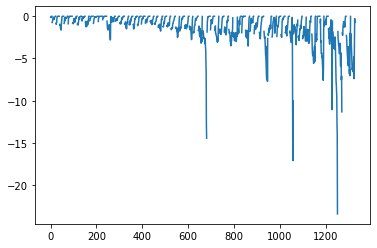

In [55]:
final_df['call_theta'].plot()

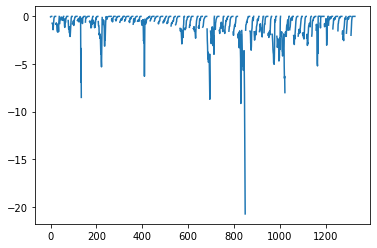

In [56]:
final_df['put_theta'].plot()
# final_df['put_theta'][30:50].plot()

## Find  Delta

In [57]:
final_df['call_delta'] = 0

for i in range(len(final_df)):
    try:
        final_df['call_delta'].iloc[i] = (mb.BS([final_df.spot_price[i],final_df.CE_OTM_Strike[i],0.05,final_df.day_to_expiry[i]],volatility = 20).callDelta)
    except:
        final_df['call_delta'].iloc[i] = np.nan

C:\ProgramData\Anaconda5\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


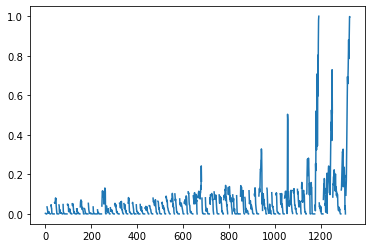

In [58]:
final_df['call_delta'].plot()

In [59]:
final_df['put_delta'] = 0

for i in range(len(final_df)):
    try:
        final_df['put_delta'].iloc[i] = (mb.BS([final_df.spot_price[i],final_df.PE_OTM_Strike[i],0.05,final_df.day_to_expiry[i]],volatility = 20).putDelta)
    except:
        final_df['put_delta'].iloc[i] = np.nan

C:\ProgramData\Anaconda5\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


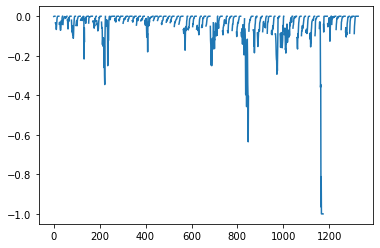

In [60]:
final_df['put_delta'].plot()

In [61]:
Table5.columns

Index(['date', 'spot_price', 'expiry', 'type', 'month_year', 'day', 'ATR',
       'PE_OTM', 'day_to_expiry', 'CE_OTM', 'strangle', 'P&L', 'Total_P&L'],
      dtype='object')

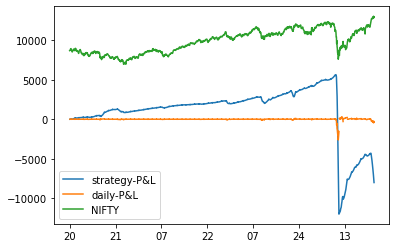

In [62]:
Table5['Total_P&L'].plot(label="strategy-P&L")
Table5['P&L'].plot(label="daily-P&L")
Table5['spot_price'].plot(label=select_contract.format())
plt.legend(loc='best')

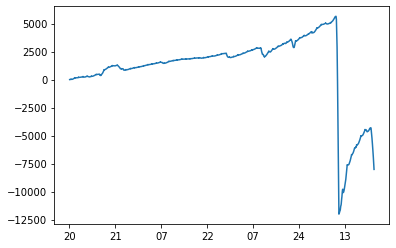

In [63]:
Table5['Total_P&L'].plot(label="strategy-P&L")

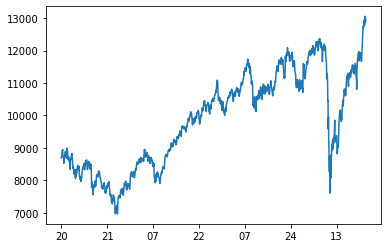

In [64]:
Table5['spot_price'].plot(label=select_contract.format())

In [65]:
Return = Table5["P&L"]/Table5["P&L"].shift(1)-1

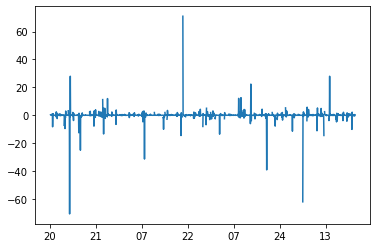

In [66]:
Return.plot()

In [67]:
daily_change = Table5["spot_price"]/Table5["spot_price"].shift(1)-1

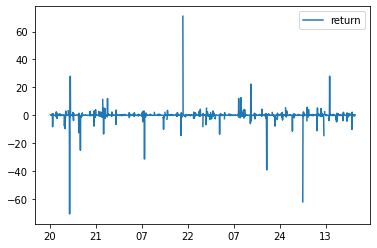

In [68]:
# daily_change.plot(label="daily_changes")
Return.plot(label="return")
plt.legend(loc='best')

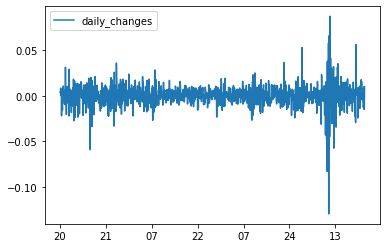

In [69]:
daily_change.plot(label="daily_changes")
# Return.plot(label="return")
plt.legend(loc='best')

### Calculate the Max drawdown in the past window days for each day

In [70]:
Table5['rolling_max']= Table5['P&L'].rolling(250,min_periods=1).max()
Table5['daily_drawdown'] = Table5['P&L']-Table5['rolling_max']

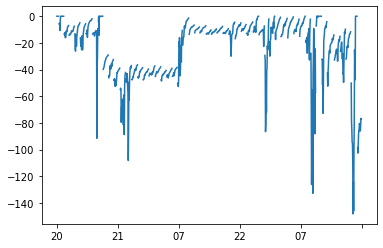

In [71]:
Table5['daily_drawdown'][0:1000].plot()

### Calculate the maximum daily drawdown

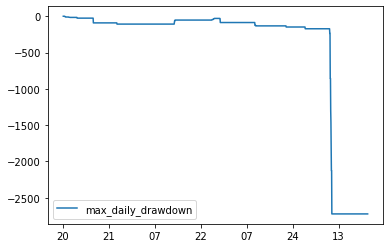

In [72]:
Table5['max_daily_drawdown']= Table5['daily_drawdown'].rolling(250,min_periods=1).min()
Table5['max_daily_drawdown'].plot(label='max_daily_drawdown')
plt.legend(loc='best')

In [73]:
df_stock = Table1

In [74]:
df_stock['return_per'] = ((Table1['spot_price'] - Table1['spot_price'].shift(1)) / Table1['spot_price']) * 100

In [75]:
df_stock['return_per'].tail(252).std()

5.896015644843017

## 

# The 68-95-99.7 Rule

![](https://miro.medium.com/max/24000/1*IdGgdrY_n_9_YfkaCh-dag.png)

| Index      | Time Interval | 1 Std Dev(68%) | 2 Std Dev(95%) | 3 Std Dev(99.7%) |
|------------|---------------|----------------|----------------|------------------|
| Nifty      | Daily         | 1.12%          | 2.24%          | 3.36%            |
| Nifty      | Weekly        | 2.36%          | 4.72%          | 7.08%            |
| Nifty      | Monthly       | 5.26%          | 10.52%         | 15.78%           |
| Bank Nifty | Daily         | 1.72%          | 3.44%          | 5.16%            |
| Bank Nifty | Weekly        | 3.84%          | 7.68%          | 11.52%           |
| Bank Nifty | Monthly       | 9.59%          | 19.18%         | 28.77%           |

In [76]:
# sns.lineplot(x=Table5.strangle,y=Table5['Total_P&L'],data=Table5)

In [77]:
final_df.columns

Index(['date', 'spot_price', 'expiry', 'type', 'month_year', 'day', 'ATR',
       'PE_OTM', 'day_to_expiry', 'CE_OTM', 'strangle', 'P&L', 'Total_P&L',
       'CE_OTM_Strike', 'PE_OTM_Strike', 'call_theta', 'put_theta',
       'call_delta', 'put_delta'],
      dtype='object')

In [78]:
# import plotly.express as px

In [79]:
# fig = px.line(final_df, x=['CE_OTM_Strike','PE_OTM_Strike','P&L'], y='expiry',color='P&L')

In [80]:
# fig = px.bar(df, x=['Total_P&L','P&L','ATR','put_theta','call_theta','strangle'], y='expiry')#,color='strangle')

In [81]:
# Table5['max_daily_drawdown','expiry'].plot()

In [82]:
# fig.show()

In [83]:
# final_df['P&L'].plot()

In [84]:
df = Table5.groupby('month_year').first()

In [85]:
# df

In [86]:
# df['strangle'] = -df['strangle']

In [87]:
# ATR = px.line(df, y=['Total_P&L','spot_price','ATR','P&L','strangle'], x='expiry')#,color='strangle')

In [88]:
# ATR.show()

In [89]:
Table5['ATR'].describe()

count    1328.000000
mean      124.729807
std        62.765366
min        62.642321
25%        89.798407
50%       110.769579
75%       138.205011
max       535.640502
Name: ATR, dtype: float64

In [123]:
final_df

,date,spot_price,expiry,type,month_year,day,ATR,PE_OTM,day_to_expiry,CE_OTM,strangle,P&L,Total_P&L,CE_OTM_Strike,PE_OTM_Strike,call_theta,put_theta,call_delta,put_delta
0,NaN,8695.6,2015-01-29 00:00:00,PE,2015-01,NaN,119.886537,4.60,9.0,1.50,-6.10,NaN,NaN,9500.0,7900.0,-0.119757,-5.411648e-02,0.002547,-1.065149e-03
1,NaN,8729.5,2015-01-29 00:00:00,PE,2015-01,NaN,112.686290,3.20,8.0,1.25,-4.45,1.65,1.65,9500.0,7900.0,-0.113778,-2.078097e-02,0.002245,-3.529655e-04
2,NaN,8761.4,2015-01-29 00:00:00,PE,2015-01,NaN,105.945722,2.65,7.0,1.15,-3.80,2.30,3.95,9500.0,7900.0,-0.100828,-6.092039e-03,0.001819,-8.813273e-05
3,NaN,8835.6,2015-01-29 00:00:00,PE,2015-01,NaN,105.851416,1.65,6.0,1.10,-2.75,3.35,7.30,9500.0,7900.0,-0.143592,-5.185332e-04,0.002444,-5.987938e-06
4,NaN,8910.5,2015-01-29 00:00:00,PE,2015-01,NaN,105.245182,1.15,2.0,0.75,-1.90,4.20,11.50,9500.0,7900.0,-0.001168,-5.472860e-14,0.000008,-2.009788e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1323,NaN,12859.0,2020-11-26 00:00:00,PE,2020-11,NaN,167.394833,1.35,6.0,389.80,-391.15,-278.95,-6608.05,12500.0,10900.0,-5.886679,-9.581783e-09,0.868084,-5.278426e-11
1324,NaN,12926.5,2020-11-26 00:00:00,PE,2020-11,NaN,165.659488,1.05,3.0,443.20,-444.25,-332.05,-6940.10,12500.0,10900.0,-2.781672,-8.919476e-19,0.968533,-2.399190e-21
1325,NaN,13055.2,2020-11-26 00:00:00,PE,2020-11,NaN,164.726667,1.10,2.0,566.90,-568.00,-455.80,-7395.90,12500.0,10900.0,-0.270758,-9.857107e-32,0.998375,-1.661890e-34
1326,NaN,12858.4,2020-11-26 00:00:00,PE,2020-11,NaN,175.253334,0.35,1.0,366.65,-367.00,-254.80,-7650.70,12500.0,10900.0,-0.707665,-1.964399e-53,0.996592,-1.841225e-56


# heatmap

In [127]:
a = final_df[final_df['month_year'] == '2020-03']

In [91]:
# del niftyreturn['date']

In [92]:
niftyreturn= Table5.groupby(['month_year']).sum()

In [93]:
niftyreturn['ATR'].tail(20)


month_year
2019-04    1870.792465
2019-05    2908.471411
2019-06    2676.717851
2019-07    2413.084554
2019-08    2976.782010
2019-09    2772.145291
2019-10    3355.615117
2019-11    2368.175495
2019-12    1949.725968
2020-01    2405.863094
2020-02    2611.028314
2020-03    6393.501734
2020-04    7734.919580
2020-05    5377.813740
2020-06    4617.295058
2020-07    4055.759747
2020-08    2969.440319
2020-09    2760.709742
2020-10    3393.019728
2020-11    3270.448470
Name: ATR, dtype: float64

In [94]:
# pip install monthly-returns-heatmap

In [95]:
import monthly_returns_heatmap as mrh

In [96]:
df.index =  pd.to_datetime(df.index)

In [97]:
df.reset_index(inplace = True)

In [98]:
# Table5.to_csv('Table5.csv')

In [99]:
df = Table5.groupby('month_year').sum()

In [100]:
# df =Table5.groupby('P&L').sum()

In [101]:
df

,spot_price,ATR,PE_OTM,day_to_expiry,CE_OTM,strangle,P&L,Total_P&L,rolling_max,daily_drawdown,max_daily_drawdown
month_year,,,,,,,,,,,
2015-01,61799.25,761.157875,14.00,33.0,6.25,-20.25,22.45,63.35,22.45,0.00,0.00
2015-02,148464.85,1948.845631,90.50,198.0,35.70,-126.20,126.25,1028.65,162.65,-30.45,-155.55
2015-03,139196.85,1890.621608,60.95,184.0,17.55,-78.50,47.10,2440.00,236.00,-174.15,-244.50
2015-04,161956.15,2199.418990,47.75,244.0,33.75,-81.50,58.15,3907.30,280.25,-207.35,-304.95
2015-05,149216.80,2239.943621,102.55,222.0,36.80,-139.35,38.85,4197.95,265.50,-211.90,-448.95
...,...,...,...,...,...,...,...,...,...,...,...
2020-07,239573.60,4055.759747,372.90,315.0,1420.05,-1792.95,881.15,-131857.95,6381.10,-5209.90,-59904.90
2020-08,214654.80,2969.440319,150.50,231.0,447.50,-598.00,804.20,-99526.45,5510.95,-4416.70,-51736.05
2020-09,204659.40,2760.709742,385.30,207.0,98.30,-483.60,560.40,-82086.35,5220.90,-4370.45,-49013.10


In [102]:
df.index = pd.to_datetime(df.index)

In [103]:
df['month'] = [i.month for i in df.index]
df['year'] = [i.year for i in df.index]

In [104]:
results = df.groupby(['year','month']) #and df.groupby('month'))

In [105]:
Return = pd.DataFrame(results['P&L'].apply(lambda row:row.iloc[0]).reset_index())

In [106]:
Return_df = Return.pivot(index='year',columns='month',values ='P&L')

In [107]:
Return_df

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2015,22.45,126.25,47.10,58.15,38.85,-1.65,159.85,-76.35,492.70,232.45,138.05,41.15
2016,-310.55,-88.50,98.15,81.60,66.90,99.60,103.95,58.65,79.05,85.55,-91.75,158.20
2017,75.95,53.65,70.65,13.70,26.45,56.25,26.45,15.90,70.00,65.90,82.25,129.05
2018,32.50,-330.60,47.35,147.45,143.45,175.50,125.80,178.20,-14.45,-769.35,469.90,229.60
2019,225.10,197.30,168.90,253.05,-148.65,286.80,204.70,150.10,124.90,391.90,315.70,113.45
2020,45.35,477.70,-17541.20,1918.55,2446.15,906.95,881.15,804.20,560.40,97.70,-3639.65,NaN


In [108]:
Return_df.columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [109]:
Return_df

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
2015,22.45,126.25,47.10,58.15,38.85,-1.65,159.85,-76.35,492.70,232.45,138.05,41.15
2016,-310.55,-88.50,98.15,81.60,66.90,99.60,103.95,58.65,79.05,85.55,-91.75,158.20
2017,75.95,53.65,70.65,13.70,26.45,56.25,26.45,15.90,70.00,65.90,82.25,129.05
2018,32.50,-330.60,47.35,147.45,143.45,175.50,125.80,178.20,-14.45,-769.35,469.90,229.60
2019,225.10,197.30,168.90,253.05,-148.65,286.80,204.70,150.10,124.90,391.90,315.70,113.45
2020,45.35,477.70,-17541.20,1918.55,2446.15,906.95,881.15,804.20,560.40,97.70,-3639.65,NaN


In [110]:
def color_positive_green(val):
    if val > 0:
        color = 'green'
    else:
        color = 'red'
    return 'background-color:%s'%color

In [111]:
results = Return_df.style.applymap(color_positive_green).set_precision(2)

In [112]:
results

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
2015,22.45,126.25,47.10,58.15,38.85,-1.65,159.85,-76.35,492.70,232.45,138.05,41.15
2016,-310.55,-88.50,98.15,81.60,66.90,99.60,103.95,58.65,79.05,85.55,-91.75,158.20
2017,75.95,53.65,70.65,13.70,26.45,56.25,26.45,15.90,70.00,65.90,82.25,129.05
2018,32.50,-330.60,47.35,147.45,143.45,175.50,125.80,178.20,-14.45,-769.35,469.90,229.60
2019,225.10,197.30,168.90,253.05,-148.65,286.80,204.70,150.10,124.90,391.90,315.70,113.45
2020,45.35,477.70,-17541.20,1918.55,2446.15,906.95,881.15,804.20,560.40,97.70,-3639.65,nan


In [113]:
import seaborn as sns

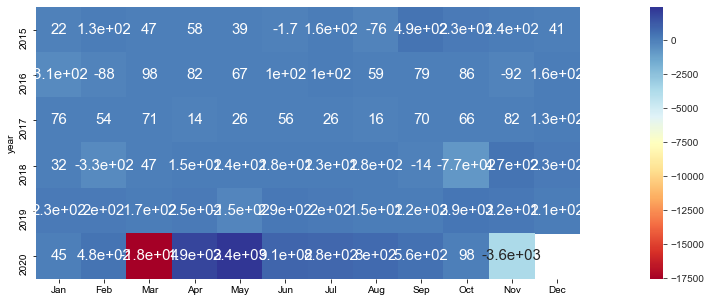

In [114]:
fig, ax = plt.subplots(figsize=(25,5))
sns.set_style('ticks')
sns.heatmap(Return_df,annot=Return_df,square=True,annot_kws={'fontsize':15},cmap ="RdYlBu")
# vmax=10,vmin=-10,linewidth=0.5 ,cmap='RdYlGn'
# sns.set_style('whitegrid')
plt.show()

In [115]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [116]:
import plotly
import cufflinks as cf
import pandas as pd
import numpy as np

#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

#To display the plots
%matplotlib inline

In [117]:
Table5.columns

Index(['date', 'spot_price', 'expiry', 'type', 'month_year', 'day', 'ATR',
       'PE_OTM', 'day_to_expiry', 'CE_OTM', 'strangle', 'P&L', 'Total_P&L',
       'rolling_max', 'daily_drawdown', 'max_daily_drawdown'],
      dtype='object')

In [118]:
Table5

,date,spot_price,expiry,type,month_year,day,ATR,PE_OTM,day_to_expiry,CE_OTM,strangle,P&L,Total_P&L,rolling_max,daily_drawdown,max_daily_drawdown
20,NaN,8695.6,2015-01-29 00:00:00,PE,2015-01,NaN,119.886537,4.60,9.0,1.50,-6.10,NaN,NaN,NaN,NaN,NaN
21,NaN,8729.5,2015-01-29 00:00:00,PE,2015-01,NaN,112.686290,3.20,8.0,1.25,-4.45,1.65,1.65,1.65,0.00,0.00
22,NaN,8761.4,2015-01-29 00:00:00,PE,2015-01,NaN,105.945722,2.65,7.0,1.15,-3.80,2.30,3.95,2.30,0.00,0.00
23,NaN,8835.6,2015-01-29 00:00:00,PE,2015-01,NaN,105.851416,1.65,6.0,1.10,-2.75,3.35,7.30,3.35,0.00,0.00
27,NaN,8910.5,2015-01-29 00:00:00,PE,2015-01,NaN,105.245182,1.15,2.0,0.75,-1.90,4.20,11.50,4.20,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,NaN,12859.0,2020-11-26 00:00:00,PE,2020-11,NaN,167.394833,1.35,6.0,389.80,-391.15,-278.95,-6608.05,290.05,-569.00,-2722.95
23,NaN,12926.5,2020-11-26 00:00:00,PE,2020-11,NaN,165.659488,1.05,3.0,443.20,-444.25,-332.05,-6940.10,290.05,-622.10,-2722.95
24,NaN,13055.2,2020-11-26 00:00:00,PE,2020-11,NaN,164.726667,1.10,2.0,566.90,-568.00,-455.80,-7395.90,290.05,-745.85,-2722.95
25,NaN,12858.4,2020-11-26 00:00:00,PE,2020-11,NaN,175.253334,0.35,1.0,366.65,-367.00,-254.80,-7650.70,290.05,-544.85,-2722.95


In [119]:
Table5.iplot(y='P&L',x='expiry',kind='bar')

In [120]:
final_df.iplot(y=['ATR'],x='expiry',kind='line')

In [121]:
final_df.iplot(y=['call_delta','put_delta'],x='expiry',kind='line')

In [122]:
# Table5['2020-03']

In [139]:
a.iplot(y=['call_delta','put_delta','P&L'],x='index',kind='line')

In [134]:
a.reset_index(inplace=True)